In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read csv
data = pd.read_csv("dataset/Data Set (Analisa).csv", delimiter=";")

In [3]:
#show data
data.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
0,30071073722,NIMAS AYU,-,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,"Rp23,000.00",Rp0.00,"Rp23,000.00"
1,30071073723,BPK ANDDREE WIDIHUTOMO,PT STANLEY BLACK & DECKER,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,"Rp13,000.00",Rp0.00,"Rp13,000.00"
2,30071073724,MRS DINNA,PT SAMUDERA INDUSTRI,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,"Rp20,000.00",Rp0.00,"Rp20,000.00"
3,30071073725,IBU MAYA,PT RAMA INDONESIA,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,"Rp14,000.00",Rp0.00,"Rp14,000.00"
4,30071073726,ANSORI,BAROKAH FOTO COPY,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,"Rp14,000.00",Rp0.00,"Rp14,000.00"


In [4]:
# Display a summary of the data frame
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 10 columns):
CN #           2148 non-null int64
Penerima       2148 non-null object
Perusahaan     1443 non-null object
Alamat         2148 non-null object
Wilayah        2148 non-null object
Isi Kiriman    2148 non-null object
SP             2148 non-null object
Biaya Kirim    2148 non-null object
Diskon         2148 non-null object
Total          2148 non-null object
dtypes: int64(1), object(9)
memory usage: 167.9+ KB


In [5]:
# Check the number of missing values in each attribute# Check  
count = data.isnull().sum()
percent = round(count / 2147 * 100, 2)
series = [count, percent]
result = pd.concat(series, axis=1, keys=['Count','Percent'])
result.sort_values(by='Count', ascending=False)

,Count,Percent
Perusahaan,705,32.84
CN #,0,0.00
Penerima,0,0.00
Alamat,0,0.00
Wilayah,0,0.00
Isi Kiriman,0,0.00
SP,0,0.00
Biaya Kirim,0,0.00
Diskon,0,0.00
Total,0,0.00


In [6]:
data.nunique()

CN #           2048
Penerima       1566
Perusahaan      911
Alamat         1635
Wilayah         194
Isi Kiriman     394
SP                4
Biaya Kirim     108
Diskon            1
Total           159
dtype: int64

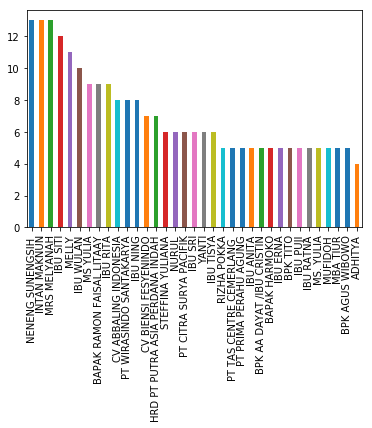

In [7]:
data['Penerima'].value_counts().sort_values(ascending=False)[:35].plot.bar()

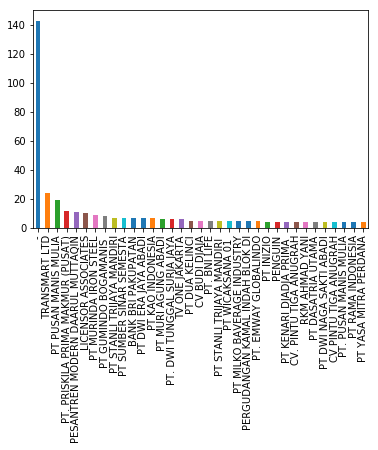

In [8]:
data['Perusahaan'].value_counts().sort_values(ascending=False)[:35].plot.bar()

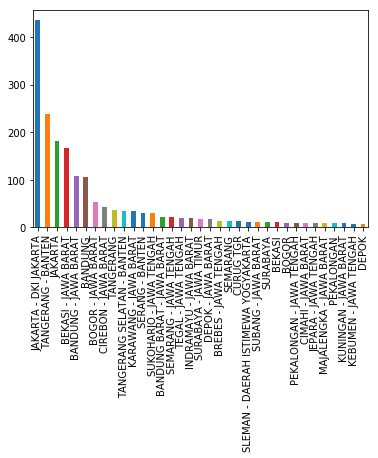

In [9]:
data['Wilayah'].value_counts().sort_values(ascending=False)[:35].plot.bar()

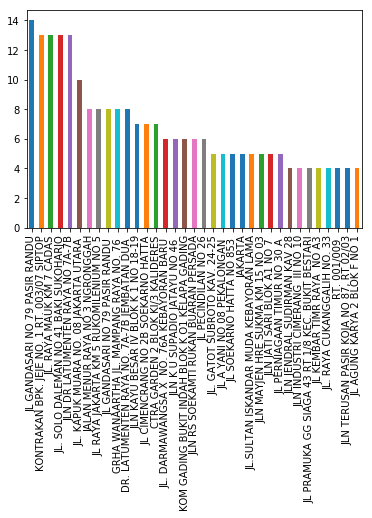

In [10]:
data['Alamat'].value_counts().sort_values(ascending=False)[:35].plot.bar()

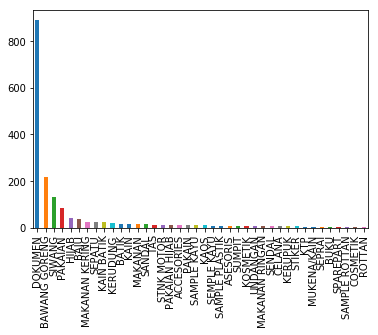

In [11]:
data['Isi Kiriman'].value_counts().sort_values(ascending=False)[:40].plot.bar()

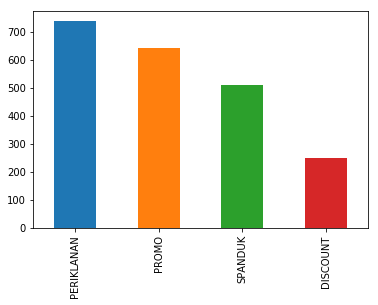

In [12]:
data['SP'].value_counts().sort_values(ascending=False)[:40].plot.bar()

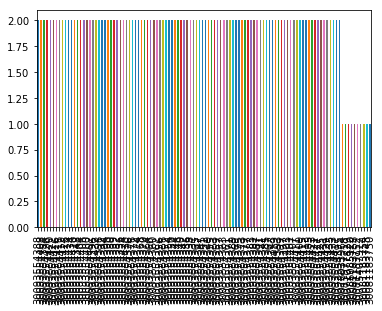

In [13]:
data['CN #'].value_counts().sort_values(ascending=False)[:110].plot.bar()

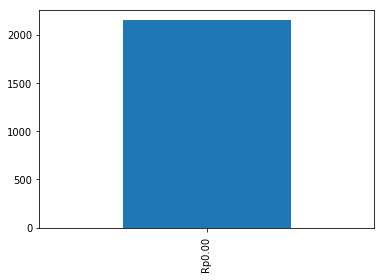

In [14]:
data['Diskon'].value_counts().sort_values(ascending=False)[:30].plot.bar()

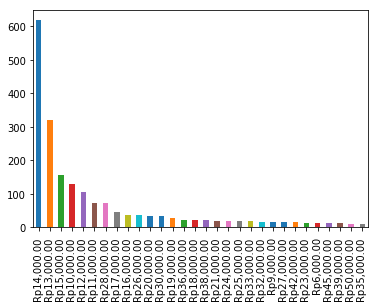

In [15]:
data['Biaya Kirim'].value_counts().sort_values(ascending=False)[:30].plot.bar()

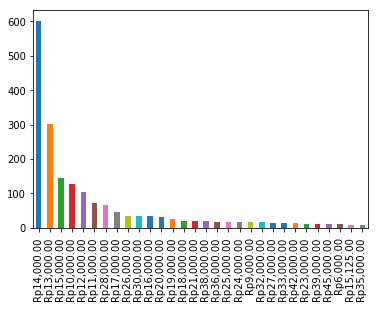

In [16]:
data['Total'].value_counts().sort_values(ascending=False)[:30].plot.bar()

In [17]:
data['Total'].describe()

count             2148
unique             159
top       Rp14,000.00 
freq               602
Name: Total, dtype: object

In [18]:
data1 = data

In [19]:
data1['Total']=(data1['Total'].replace( '[Rp,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [20]:
data1.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
0,30071073722,NIMAS AYU,-,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,"Rp23,000.00",Rp0.00,23000.0
1,30071073723,BPK ANDDREE WIDIHUTOMO,PT STANLEY BLACK & DECKER,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,"Rp13,000.00",Rp0.00,13000.0
2,30071073724,MRS DINNA,PT SAMUDERA INDUSTRI,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,"Rp20,000.00",Rp0.00,20000.0
3,30071073725,IBU MAYA,PT RAMA INDONESIA,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,"Rp14,000.00",Rp0.00,14000.0
4,30071073726,ANSORI,BAROKAH FOTO COPY,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,"Rp14,000.00",Rp0.00,14000.0


In [21]:
data['Total'].describe()

count      2148.000000
mean      23446.235102
std       38172.047255
min        4000.000000
25%       13000.000000
50%       14000.000000
75%       22000.000000
max      999000.000000
Name: Total, dtype: float64

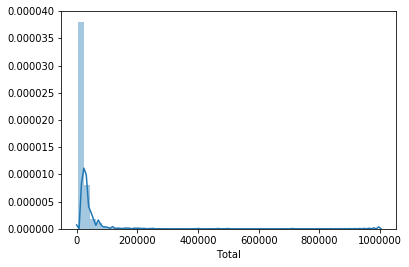

In [22]:
import seaborn as sns
sns.distplot(data1['Total']);

In [23]:
#standardizing data
scalad = StandardScaler().fit_transform(data1['Total'][:,np.newaxis]);
low_range = scalad[scalad[:,0].argsort()][:10]
high_range= scalad[scalad[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)




outer range (low) of the distribution:
[[-0.50955515]
 [-0.50955515]
 [-0.48335187]
 [-0.48335187]
 [-0.48335187]
 [-0.48335187]
 [-0.48335187]
 [-0.45714859]
 [-0.45714859]
 [-0.45714859]]

outer range (high) of the distribution:
[[ 3.78778283]
 [ 3.78778283]
 [ 3.81398611]
 [ 4.02361235]
 [ 4.364255  ]
 [ 4.41666156]
 [ 4.52147468]
 [ 4.6262878 ]
 [ 4.78350748]
 [ 4.8883206 ]
 [ 5.09794685]
 [ 5.28136981]
 [ 5.67441901]
 [ 5.80543542]
 [ 6.01506166]
 [ 9.86694387]
 [11.54395381]
 [12.3562555 ]
 [18.0947739 ]
 [25.5627088 ]]


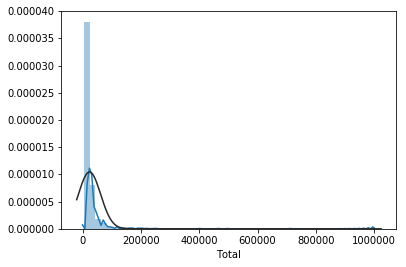

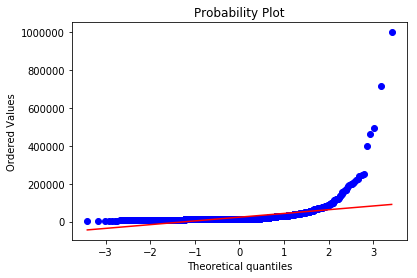

In [24]:
#histogram and normal probability plot
sns.distplot(data1['Total'], fit=norm);
fig = plt.figure()
res = stats.probplot(data1['Total'], plot=plt)

In [ ]:


Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

In [25]:
data2 = data1[data1['Total'] > 100000]

In [26]:
data2.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
166,30071077916,BAPAK ALI,-,JLN ADMINISTRASI 2 RT 5/9 NO 20,JAKARTA - DKI JAKARTA,BUAH MANGGA,PROMO,"Rp143,000.00",Rp0.00,143000.0
279,30073506331,KAYATI,-,JL PERUM PALEM GANDA ASRI NO 2 KLASTER AA BL...,TANGERANG - BANTEN,MAKANAN (KUE KERING),PERIKLANAN,"Rp154,000.00",Rp0.00,154000.0
328,30073513281,IBU DIAS,NaN,JL MISOL (DERETAN SALON RUDY),SORONG - PAPUA BARAT,MAKANAN KERING (KERUPUK),DISCOUNT,"Rp115,000.00",Rp0.00,115000.0
413,30093544717,IBU VONY,TOKO MUJUR ROTAN,JL S SADDANG NO 90,MAKASSAR - SULAWESI SELATAN,COVER JOK ROTTAN,PROMO,"Rp400,000.00",Rp0.00,400000.0
418,30093544722,PAK YOS,UD. AKIRUDIN,JL ULU GADUT NO 15 GUDANG MANAU SAMPING PGSD,PADANG,PISAU ROTAN DAN AMPLASS,SPANDUK,"Rp999,000.00",Rp0.00,999000.0


In [27]:
data1 = data1.drop(data1[data1['Total'] > 100000].index)

In [28]:
#standardizing data
scalad = StandardScaler().fit_transform(data1['Total'][:,np.newaxis]);
low_range = scalad[scalad[:,0].argsort()][:10]
high_range= scalad[scalad[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.13383913]
 [-1.13383913]
 [-1.06239702]
 [-1.06239702]
 [-1.06239702]
 [-1.06239702]
 [-1.06239702]
 [-0.99095492]
 [-0.99095492]
 [-0.99095492]]

outer range (high) of the distribution:
[[4.29576085]
 [4.29576085]
 [4.29576085]
 [4.43864506]
 [4.58152927]
 [4.58152927]
 [4.58152927]
 [4.65297138]
 [4.79585559]
 [5.0101819 ]
 [5.0101819 ]
 [5.08162401]
 [5.08162401]
 [5.36739243]
 [5.36739243]
 [5.65316085]
 [5.65316085]
 [5.65316085]
 [5.65316085]
 [5.72460295]]


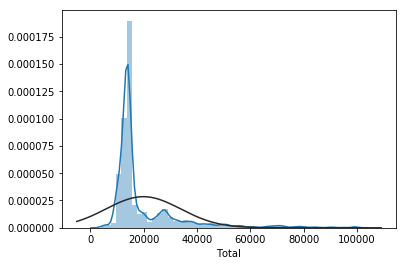

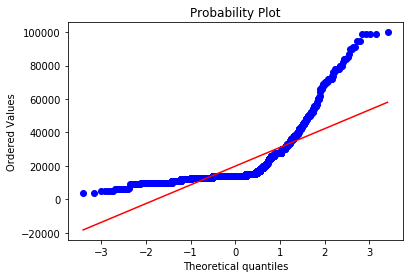

In [29]:
#histogram and normal probability plot
sns.distplot(data1['Total'], fit=norm);
fig = plt.figure()
res = stats.probplot(data1['Total'], plot=plt)